## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

Erro Quadrático Médio (MSE) na base de treinamento: 2948047718.42
Coeficiente de determinação (R²) na base de treinamento: 0.78


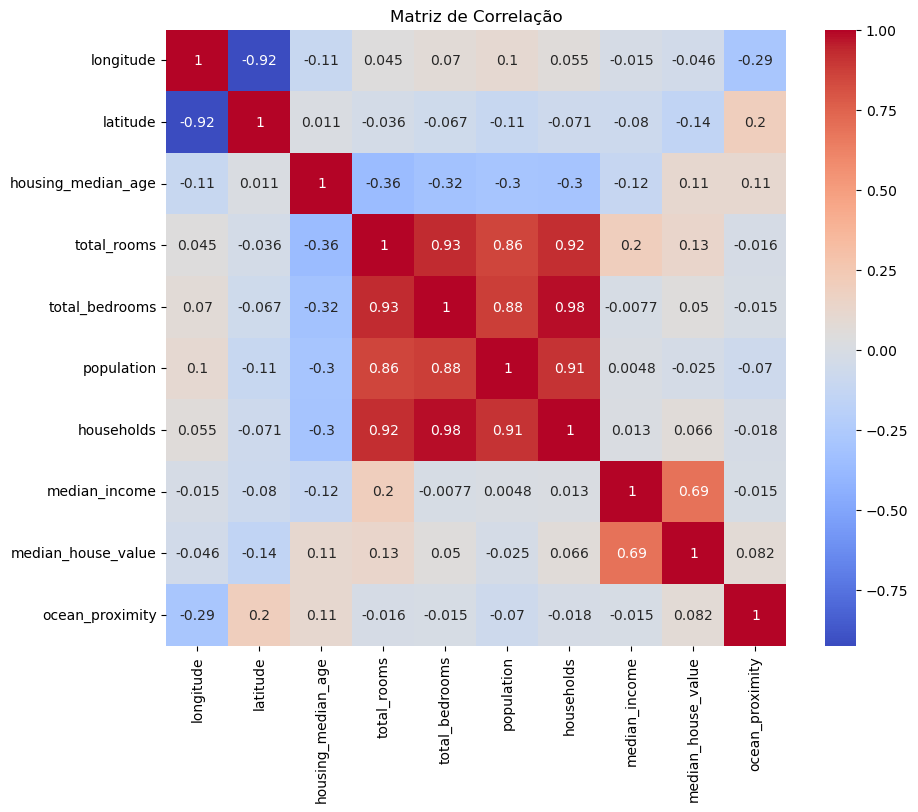

In [4]:
df = pd.read_csv('housing.csv')

label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2402)

tree_reg = DecisionTreeRegressor(max_depth=8, random_state=2402)
tree_reg.fit(X_train, y_train)

y_train_pred = tree_reg.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Erro Quadrático Médio (MSE) na base de treinamento: {mse_train:.2f}")

r2_train = tree_reg.score(X_train, y_train)
print(f"Coeficiente de determinação (R²) na base de treinamento: {r2_train:.2f}")

plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [6]:
path = tree_reg.cost_complexity_pruning_path(X=X_train, y=y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.16279070e+01, 1.52213609e+04, 2.49625323e+04,
        2.75400517e+04, 4.69569336e+04, 5.24709302e+04, 8.07525840e+04,
        9.43255814e+04, 1.01291990e+05, 1.06791021e+05, 1.09221481e+05,
        1.12828198e+05, 1.30275624e+05, 1.60537791e+05, 1.81686047e+05,
        2.60672105e+05, 2.70876080e+05, 3.04446531e+05, 3.19711940e+05,
        3.23003876e+05, 3.67269631e+05, 3.77802230e+05, 3.86192540e+05,
        4.04008906e+05, 4.05295104e+05, 4.15721899e+05, 4.33168159e+05,
        4.66972095e+05, 4.68276390e+05, 4.80002584e+05, 4.83040801e+05,
        5.05694456e+05, 5.43148953e+05, 5.96103467e+05, 6.05349160e+05,
        6.09243884e+05, 6.31402500e+05, 7.05816311e+05, 7.98000374e+05,
        8.41408290e+05, 8.99197101e+05, 9.15559467e+05, 1.03942637e+06,
        1.09789844e+06, 1.11790746e+06, 1.14682963e+06, 1.15319143e+06,
        1.22134286e+06, 1.23926615e+06, 1.25724651e+06, 1.27166038e+06,
        1.30264944e+06, 1.31716137e+06, 1.31764707

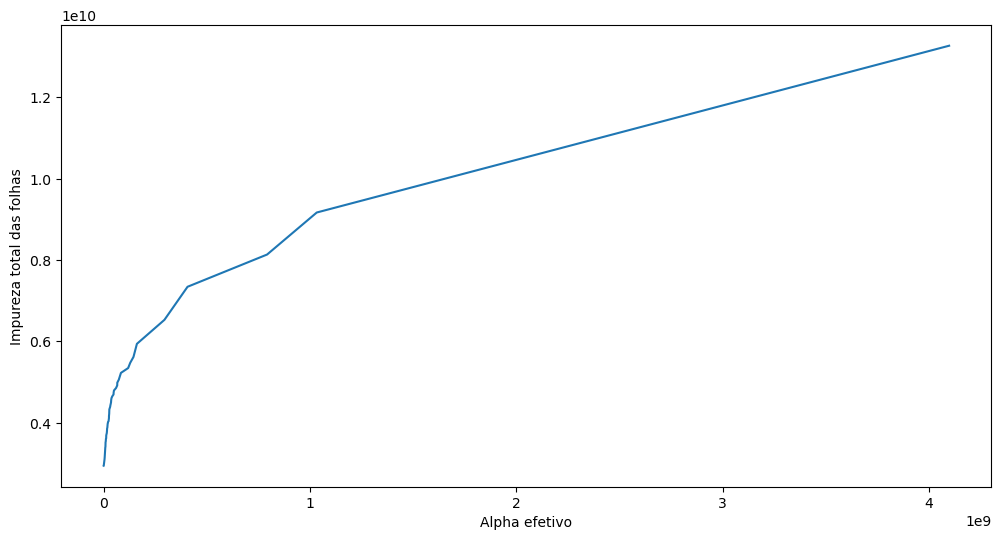

In [8]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(12,6))
plt.plot(ccp_alphas, impurities)

plt.xlabel(xlabel='Alpha efetivo')
plt.ylabel(ylabel='Impureza total das folhas')

plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [10]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=2402)
    clf.fit(X_train, y_train)
    clfs.append(clf)

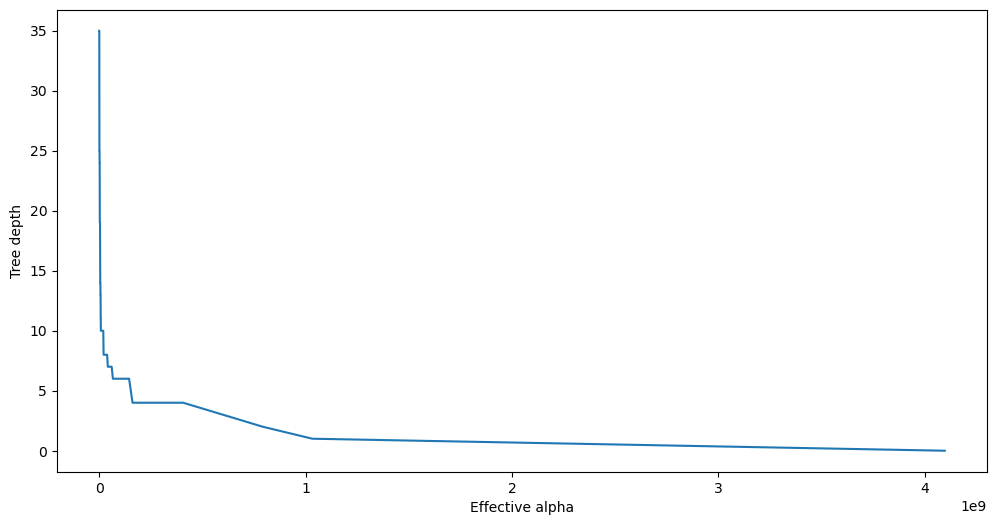

In [11]:
tree_depths = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(12, 6))
plt.plot(ccp_alphas, tree_depths)

plt.xlabel(xlabel='Effective alpha')
plt.ylabel(ylabel='Tree depth')

plt.show()

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [14]:
train_scores = [mean_squared_error(y_true=y_train, 
                                   y_pred=clf.predict(X_train)) for clf in clfs]

test_scores  = [mean_squared_error(y_true=y_test, 
                                   y_pred=clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

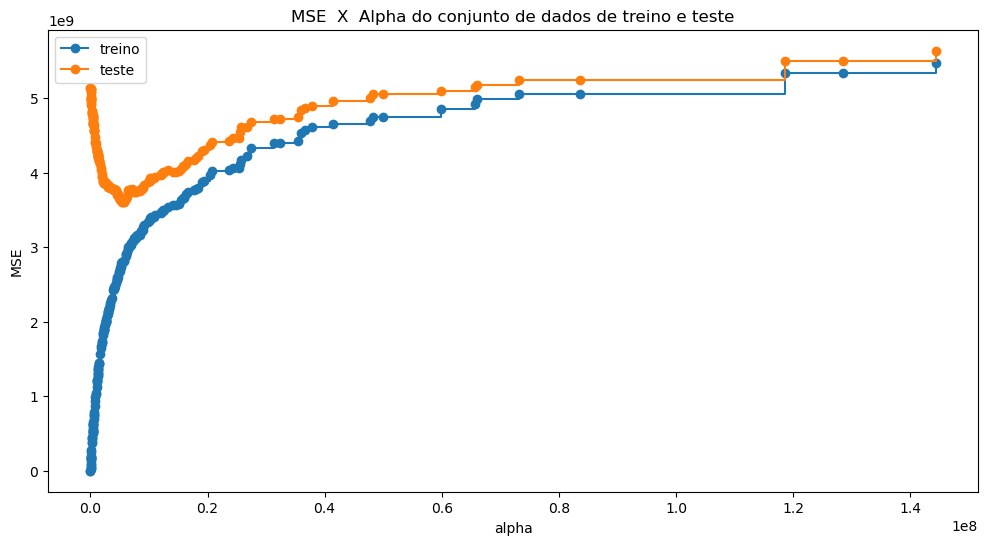

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlabel(xlabel='alpha')
ax.set_ylabel(ylabel='MSE')
ax.set_title(label='MSE  X  Alpha do conjunto de dados de treino e teste')

ax.plot(ccp_alphas[:-6], train_scores[:-6], 
        marker='o', label='treino', drawstyle='steps-post')

ax.plot(ccp_alphas[:-6], test_scores[:-6], 
        marker='o', label='teste', drawstyle='steps-post')

ax.legend()

plt.show()


In [20]:
df_ccp = pd.DataFrame(data={'ccp_alphas':ccp_alphas, 
                            'train_scores':train_scores, 
                            'test_scores':test_scores})

df_ccp.sort_values(by=['test_scores', 'train_scores'])

,ccp_alphas,train_scores,test_scores
118,5.668569e+06,2.820234e+09,3.602959e+09
119,5.693886e+06,2.820234e+09,3.602959e+09
117,5.442930e+06,2.803364e+09,3.606601e+09
116,5.315507e+06,2.797921e+09,3.608219e+09
111,5.061779e+06,2.719261e+09,3.633467e+09
...,...,...,...
203,2.943195e+08,6.530673e+09,6.635236e+09
204,4.063881e+08,6.530673e+09,6.635236e+09
205,7.917567e+08,8.135206e+09,8.167373e+09
206,1.032446e+09,9.167651e+09,9.249077e+09


In [22]:
ccp_alpha_min = df_ccp.sort_values(by=['test_scores', 'train_scores']).iloc[0,0]
ccp_alpha_min

5668569.069220066

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [24]:
final_tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha_min, random_state=2402)
final_tree.fit(X_train, y_train)

print(f'Profundidade: {final_tree.tree_.max_depth}')
print(f'R-quadrado na base de testes: {final_tree.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, final_tree.predict(X_test)):.2f}')

Profundidade: 13
R-quadrado na base de testes: 0.73
MSE na base de testes: 3602958778.30


### 7. Visualize esta árvore.

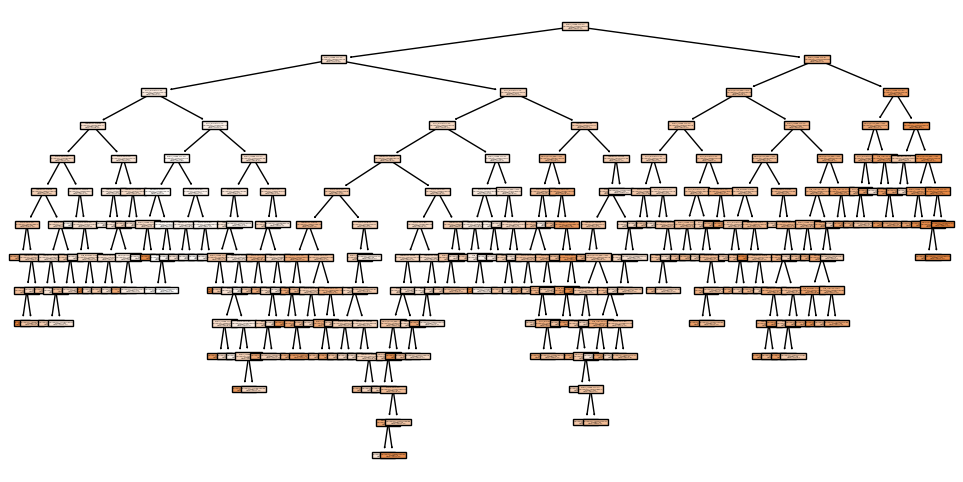

In [26]:
plt.rc('figure', figsize=(12,6))

tree.plot_tree(decision_tree=final_tree, 
               feature_names=X.columns, 
               filled=True);